In [24]:
#importing packages for data visualization and analysis
import pandas as pd
import matplotlib.pyplot as plt

#two main variables we will be working with; associated directly with our data sources
print("Current working directory:", os.getcwd())
exempt_df = pd.read_csv("dataset1.csv")
issued_df = pd.read_csv("dataset2.csv")

#gives a preview into each of the datasets
print("Exempt dataset shape:", exempt_df.shape)
display(exempt_df.head())

print("Issued dataset shape:", issued_df.shape)
display(issued_df.head())

Current working directory: /Users/syedarahman/Desktop/mhc datathon
Exempt dataset shape: (90819, 15)


,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference
0,489741940,7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...,08/20/2025 10:52:57 AM,08/20/2025 11:16:57 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.815113,-73.955040,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95504 40.815113),POINT (-73.954424 40.816009)
1,489741935,e9122b4e6dac9160ed4fca952a3815fe4c737bfc70cb97...,08/20/2025 11:35:29 PM,08/20/2025 11:39:32 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.795630,-73.941683,402704,3 AV/E 109 ST,40.793765,-73.943005,POINT (-73.941683 40.79563),POINT (-73.943005 40.793765)
2,489741747,de04d0589e26e7da94c192dff0be14d105abcc8342c87f...,08/20/2025 11:18:06 PM,08/20/2025 11:24:10 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,M101,40.808403,-73.946993,402658,W 125 ST/ADAM C POWELL BLVD,40.808700,-73.947836,POINT (-73.946993 40.808403),POINT (-73.947836 40.8087)
3,489741639,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,08/20/2025 10:58:39 PM,08/20/2025 11:02:18 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842800,-73.934798,405069,AMSTERDAM AV/W 175 ST,40.843810,-73.934076,POINT (-73.934798 40.8428),POINT (-73.934076 40.84381)
4,489741298,ebabc585284d95a10b6b45730c38fa55dfd57bcc5aea30...,08/20/2025 07:51:36 PM,08/20/2025 09:22:42 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842453,-73.935029,402740,AMSTERDAM AV/W 171 ST,40.841978,-73.935267,POINT (-73.935029 40.842453),POINT (-73.935267 40.841978)


Issued dataset shape: (173103, 15)


,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference
0,488516121,642528f0cd869a4e8b83900ebed5bf1fa0c0ffd2395e44...,08/13/2025 12:29:07 AM,08/13/2025 12:34:08 AM,VIOLATION ISSUED,MOBILE BUS LANE,M101,40.752435,-73.975316,402843,LEXINGTON AV/E 45 ST,40.753095,-73.974905,POINT (-73.975316 40.752435),POINT (-73.974905 40.753095)
1,488516114,7510d1cf1c0eddb665f506ba933c3dc5c2a22e71479800...,08/13/2025 08:42:47 AM,08/13/2025 08:51:13 AM,VIOLATION ISSUED,MOBILE BUS LANE,M101,40.766024,-73.963286,403545,3 AV/E 60 ST,40.762558,-73.965738,POINT (-73.963286 40.766024),POINT (-73.965738 40.762558)
2,488477643,c83fa1cbb96db6ed7ca17e96297213fac1601fa4a72b98...,08/13/2025 09:20:43 AM,08/13/2025 09:30:03 AM,VIOLATION ISSUED,MOBILE BUS LANE,M101,40.769135,-73.961101,402688,3 AV/E 67 ST,40.767113,-73.962513,POINT (-73.961101 40.769135),POINT (-73.962513 40.767113)
3,488473567,ad306c4aff8cfdb162dcd22fb8ea0b91380ad55cf13cb7...,08/13/2025 08:20:36 AM,08/13/2025 08:47:14 AM,VIOLATION ISSUED,MOBILE BUS LANE,M101,40.760673,-73.969209,402670,3 AV/E 17 ST,40.735511,-73.985465,POINT (-73.969209 40.760673),POINT (-73.985465 40.735511)
4,488472815,04f5ffea1b5b85bcb6daf3d19ed4998bc5ca7d93853fef...,08/13/2025 08:34:54 AM,08/13/2025 08:45:09 AM,VIOLATION ISSUED,MOBILE BUS LANE,M101,40.773190,-73.960127,402811,LEXINGTON AV/E 110 ST,40.794544,-73.944667,POINT (-73.960127 40.77319),POINT (-73.944667 40.794544)


In [29]:
#Reveals the top 10 Vehicles with the highest violation counts
exempt_repeat = (
    exempt_df.groupby('Vehicle ID')
    .size()
    .reset_index(name='violation_count')
    .sort_values(by='violation_count', ascending=False)
    .head(10)
)

print(exempt_repeat)

                                              Vehicle ID  violation_count
2835   1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...             1340
9586   6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...              903
9258   6979a2434b4611cf1ebf80624eaeb29622929b061958b9...              903
3756   2a8ac01b157a97b3c124cf33322e71c31062b815dd3b0a...              864
20579  ebabc585284d95a10b6b45730c38fa55dfd57bcc5aea30...              787
17872  cbebd9b5a63416b9c246a35d3b5fc36214871dab0e5ccf...              729
11305  80e7bae594e62aaaf4ed702b8230dfd12559743828922b...              628
3232   24908a1da372fdb0f5f03bcf7001ee589cf492894d5792...              605
8429   6059dcc4ef4516ca9f357ca2a789b9c4ca9c633258f212...              537
1278   0e92016a483877f5c62115578a642425d710c43560e00c...              537


Top 10 Exempt Violation Hotspots


,lat_bin,lon_bin,violation_count
325,40.843,-73.935,8851
324,40.842,-73.935,3270
138,40.774,-73.960,2453
15,40.737,-73.984,2431
277,40.815,-73.955,2036
117,40.767,-73.963,1759
308,40.833,-73.942,1648
201,40.791,-73.945,1560
16,40.738,-73.984,1398
310,40.834,-73.941,1394


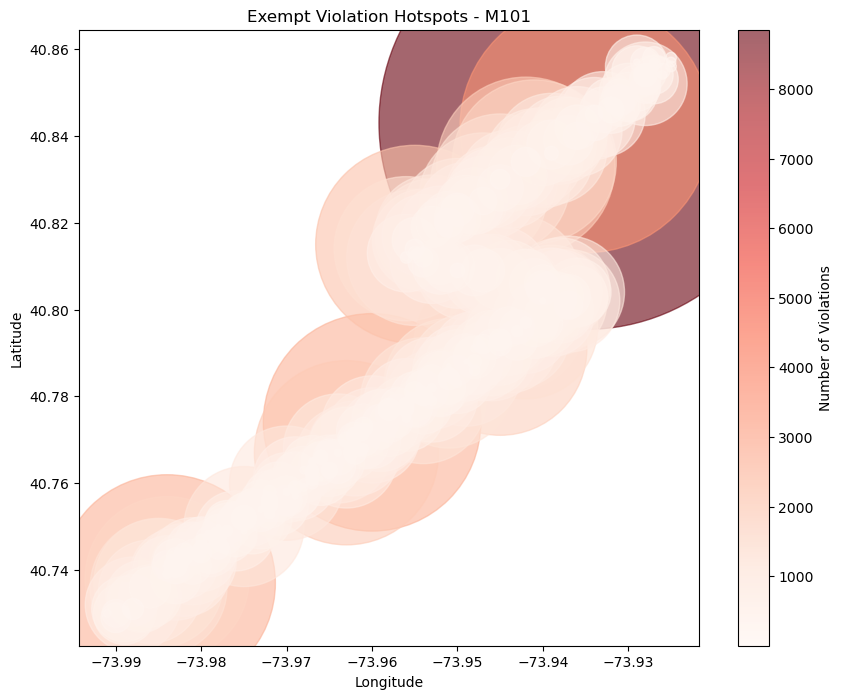

In [17]:
#Prints the top 10 hotspot locations 
print("Top 10 Exempt Violation Hotspots")
display(location_counts.head(10))

plt.figure(figsize=(10,8))
plt.scatter(location_counts['lon_bin'], location_counts['lat_bin'], 
            s=location_counts['violation_count']*10,
            c=location_counts['violation_count'], cmap='Reds', alpha=0.6)
plt.colorbar(label='Number of Violations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Exempt Violation Hotspots - M101')
plt.show()

In [33]:
#Focuses in on the top exempt violator, its locations, what stops, what type of violations etc
top_offender = exempt_repeat.iloc[0]
vehicle_id = top_offender['Vehicle ID']

print("Top Exempt Offender Vehicle ID:", vehicle_id)
print("Total Violations:", top_offender['violation_count'])

vehicle_df = exempt_df[exempt_df['Vehicle ID'] == vehicle_id]

print("\nSample Records for This Vehicle")
display(vehicle_df.head(10))

print("\nViolation Types Breakdown")
display(vehicle_df['Violation Type'].value_counts())

print("\nTop 5 Stop Names for This Vehicle")
display(vehicle_df['Stop Name'].value_counts().head(5))

Top Exempt Offender Vehicle ID: 1feaad876c46cfe1cc4ee357e410ec2054c5c231d268169dfdd9527c1c084a80
Total Violations: 1340

Sample Records for This Vehicle


,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference,lat_bin,lon_bin
34,489736398,1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...,08/20/2025 04:38:40 PM,08/20/2025 05:28:26 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.766589,-73.962891,403545,3 AV/E 60 ST,40.762558,-73.965738,POINT (-73.962891 40.766589),POINT (-73.965738 40.762558),40.767,-73.963
58,489734756,1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...,08/20/2025 12:24:56 PM,08/20/2025 02:08:55 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.766608,-73.962886,405070,AMSTERDAM AV/W 165 ST,40.837603,-73.938646,POINT (-73.962886 40.766608),POINT (-73.938646 40.837603),40.767,-73.963
113,489651592,1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...,08/20/2025 05:54:18 AM,08/20/2025 07:54:30 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.766574,-73.962906,402687,3 AV/E 65 ST,40.765599,-73.963509,POINT (-73.962906 40.766574),POINT (-73.963509 40.765599),40.767,-73.963
237,489517428,1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...,08/19/2025 08:50:37 PM,08/19/2025 10:26:28 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.766551,-73.962856,403545,3 AV/E 60 ST,40.762558,-73.965738,POINT (-73.962856 40.766551),POINT (-73.965738 40.762558),40.767,-73.963
265,489510799,1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...,08/19/2025 04:28:20 PM,08/19/2025 05:13:17 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.766557,-73.962860,403545,3 AV/E 60 ST,40.762558,-73.965738,POINT (-73.96286 40.766557),POINT (-73.965738 40.762558),40.767,-73.963
350,489366263,1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...,08/19/2025 12:10:13 PM,08/19/2025 01:02:32 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.766575,-73.962886,403545,3 AV/E 60 ST,40.762558,-73.965738,POINT (-73.962886 40.766575),POINT (-73.965738 40.762558),40.767,-73.963
353,489366201,1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...,08/19/2025 09:28:59 AM,08/19/2025 09:41:13 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.766559,-73.962825,403545,3 AV/E 60 ST,40.762558,-73.965738,POINT (-73.962825 40.766559),POINT (-73.965738 40.762558),40.767,-73.963
359,489366175,1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...,08/19/2025 05:53:21 AM,08/19/2025 06:25:57 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.766558,-73.962860,402687,3 AV/E 65 ST,40.765599,-73.963509,POINT (-73.96286 40.766558),POINT (-73.963509 40.765599),40.767,-73.963
427,489355089,1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...,08/18/2025 09:04:05 PM,08/18/2025 09:49:19 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.766570,-73.962865,402687,3 AV/E 65 ST,40.765599,-73.963509,POINT (-73.962865 40.76657),POINT (-73.963509 40.765599),40.767,-73.963
443,489348119,1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...,08/18/2025 05:20:50 PM,08/18/2025 05:31:14 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.766567,-73.962884,402687,3 AV/E 65 ST,40.765599,-73.963509,POINT (-73.962884 40.766567),POINT (-73.963509 40.765599),40.767,-73.963



Violation Types Breakdown


Violation Type
MOBILE BUS STOP    1338
MOBILE BUS LANE       2
Name: count, dtype: int64


Top 5 Stop Names for This Vehicle


Stop Name
3 AV/E 60 ST             535
3 AV/E 65 ST             438
3 AV/E 37 ST              91
E 125 ST/PARK AV          36
AMSTERDAM AV/W 165 ST     32
Name: count, dtype: int64

In [32]:
#Focuses in on the 2nd top exempt violator, its locations, what stops, what type of violations etc
top_offender = exempt_repeat.iloc[1]
vehicle_id = top_offender['Vehicle ID']

print("Top Exempt Offender Vehicle ID:", vehicle_id)
print("Total Violations:", top_offender['violation_count'])

vehicle_df = exempt_df[exempt_df['Vehicle ID'] == vehicle_id]

print("\nSample Records for This Vehicle")
display(vehicle_df.head(10))

print("\nViolation Types Breakdown")
display(vehicle_df['Violation Type'].value_counts())

print("\nTop 5 Stop Names for This Vehicle")
display(vehicle_df['Stop Name'].value_counts().head(5))

Top Exempt Offender Vehicle ID: 6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31acec87ab5642558d4360b
Total Violations: 903

Sample Records for This Vehicle


,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference,lat_bin,lon_bin
3,489741639,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,08/20/2025 10:58:39 PM,08/20/2025 11:02:18 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842800,-73.934798,405069,AMSTERDAM AV/W 175 ST,40.84381,-73.934076,POINT (-73.934798 40.8428),POINT (-73.934076 40.84381),40.843,-73.935
27,489736674,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,08/20/2025 05:30:41 PM,08/20/2025 05:36:34 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842786,-73.934831,405069,AMSTERDAM AV/W 175 ST,40.84381,-73.934076,POINT (-73.934831 40.842786),POINT (-73.934076 40.84381),40.843,-73.935
96,489655728,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,08/20/2025 09:28:42 AM,08/20/2025 09:37:47 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842813,-73.934786,405069,AMSTERDAM AV/W 175 ST,40.84381,-73.934076,POINT (-73.934786 40.842813),POINT (-73.934076 40.84381),40.843,-73.935
129,489646517,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,08/20/2025 05:36:52 AM,08/20/2025 05:56:23 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842794,-73.934803,405069,AMSTERDAM AV/W 175 ST,40.84381,-73.934076,POINT (-73.934803 40.842794),POINT (-73.934076 40.84381),40.843,-73.935
145,489642181,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,08/20/2025 12:03:44 AM,08/20/2025 12:20:20 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842776,-73.934817,405069,AMSTERDAM AV/W 175 ST,40.84381,-73.934076,POINT (-73.934817 40.842776),POINT (-73.934076 40.84381),40.843,-73.935
150,489580198,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,08/19/2025 11:11:19 PM,08/19/2025 11:39:52 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842809,-73.934786,405069,AMSTERDAM AV/W 175 ST,40.84381,-73.934076,POINT (-73.934786 40.842809),POINT (-73.934076 40.84381),40.843,-73.935
151,489580003,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,08/19/2025 07:00:30 PM,08/19/2025 07:08:29 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842799,-73.934821,405069,AMSTERDAM AV/W 175 ST,40.84381,-73.934076,POINT (-73.934821 40.842799),POINT (-73.934076 40.84381),40.843,-73.935
154,489579916,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,08/19/2025 04:59:11 PM,08/19/2025 06:06:27 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842791,-73.934823,405069,AMSTERDAM AV/W 175 ST,40.84381,-73.934076,POINT (-73.934823 40.842791),POINT (-73.934076 40.84381),40.843,-73.935
157,489579895,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,08/19/2025 08:09:17 PM,08/19/2025 09:09:21 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842781,-73.934810,405069,AMSTERDAM AV/W 175 ST,40.84381,-73.934076,POINT (-73.93481 40.842781),POINT (-73.934076 40.84381),40.843,-73.935
173,489579356,6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...,08/19/2025 02:57:46 PM,08/19/2025 03:12:47 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.842806,-73.934813,405069,AMSTERDAM AV/W 175 ST,40.84381,-73.934076,POINT (-73.934813 40.842806),POINT (-73.934076 40.84381),40.843,-73.935



Violation Types Breakdown


Violation Type
MOBILE DOUBLE PARKED    890
MOBILE BUS STOP          10
MOBILE BUS LANE           3
Name: count, dtype: int64


Top 5 Stop Names for This Vehicle


Stop Name
AMSTERDAM AV/W 175 ST          524
AMSTERDAM AV/W 171 ST          336
AMSTERDAM AV/W 161 ST            4
AMSTERDAM AV/W 158 ST            3
W 125 ST/ADAM C POWELL BLVD      3
Name: count, dtype: int64

In [34]:
#Focuses in on the 3rd top exempt violator, its locations, what stops, what type of violations etc
top_offender = exempt_repeat.iloc[2]
vehicle_id = top_offender['Vehicle ID']

print("Top Exempt Offender Vehicle ID:", vehicle_id)
print("Total Violations:", top_offender['violation_count'])

vehicle_df = exempt_df[exempt_df['Vehicle ID'] == vehicle_id]

print("\nSample Records for This Vehicle")
display(vehicle_df.head(10))

print("\nViolation Types Breakdown")
display(vehicle_df['Violation Type'].value_counts())

print("\nTop 5 Stop Names for This Vehicle")
display(vehicle_df['Stop Name'].value_counts().head(5))

Top Exempt Offender Vehicle ID: 6979a2434b4611cf1ebf80624eaeb29622929b061958b956f0d93024261a4a3c
Total Violations: 903

Sample Records for This Vehicle


,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference,lat_bin,lon_bin
4988,486068585,6979a2434b4611cf1ebf80624eaeb29622929b061958b9...,07/30/2025 12:44:20 PM,07/30/2025 12:49:42 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,M101,40.811021,-73.953195,402723,W 125 ST/MORNINGSIDE AV,40.811402,-73.954184,POINT (-73.953195 40.811021),POINT (-73.954184 40.811402),40.811,-73.953
5316,485896686,6979a2434b4611cf1ebf80624eaeb29622929b061958b9...,07/29/2025 02:46:14 PM,07/29/2025 02:55:00 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,M101,40.806688,-73.942850,402506,W 125 ST/5 AV,40.806542,-73.942440,POINT (-73.94285 40.806688),POINT (-73.94244 40.806542),40.807,-73.943
17231,478462999,6979a2434b4611cf1ebf80624eaeb29622929b061958b9...,06/14/2025 02:58:18 PM,06/14/2025 03:38:58 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.814438,-73.955520,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.95552 40.814438),POINT (-73.954424 40.816009),40.814,-73.956
17233,478462926,6979a2434b4611cf1ebf80624eaeb29622929b061958b9...,06/14/2025 02:58:18 PM,06/14/2025 03:04:22 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE DOUBLE PARKED,M101,40.814439,-73.955521,401459,AMSTERDAM AV/W 129 ST,40.814859,-73.955250,POINT (-73.955521 40.814439),POINT (-73.95525 40.814859),40.814,-73.956
17960,478051747,6979a2434b4611cf1ebf80624eaeb29622929b061958b9...,06/13/2025 12:43:40 PM,06/13/2025 12:50:19 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,M101,40.811073,-73.953294,402723,W 125 ST/MORNINGSIDE AV,40.811402,-73.954184,POINT (-73.953294 40.811073),POINT (-73.954184 40.811402),40.811,-73.953
20118,476539879,6979a2434b4611cf1ebf80624eaeb29622929b061958b9...,06/04/2025 04:44:12 PM,06/04/2025 04:46:43 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.811589,-73.954575,402653,W 125 ST/AMSTERDAM AV,40.812602,-73.955693,POINT (-73.954575 40.811589),POINT (-73.955693 40.812602),40.812,-73.955
35910,467699039,6979a2434b4611cf1ebf80624eaeb29622929b061958b9...,04/18/2025 12:29:14 PM,04/18/2025 12:41:54 PM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.814853,-73.955287,401459,AMSTERDAM AV/W 129 ST,40.814859,-73.955250,POINT (-73.955287 40.814853),POINT (-73.95525 40.814859),40.815,-73.955
35927,467698464,6979a2434b4611cf1ebf80624eaeb29622929b061958b9...,04/18/2025 10:11:59 AM,04/18/2025 10:24:29 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.814879,-73.955228,401459,AMSTERDAM AV/W 129 ST,40.814859,-73.955250,POINT (-73.955228 40.814879),POINT (-73.95525 40.814859),40.815,-73.955
35936,467696804,6979a2434b4611cf1ebf80624eaeb29622929b061958b9...,04/18/2025 07:54:54 AM,04/18/2025 08:07:00 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.814875,-73.955239,401459,AMSTERDAM AV/W 129 ST,40.814859,-73.955250,POINT (-73.955239 40.814875),POINT (-73.95525 40.814859),40.815,-73.955
46463,462761740,6979a2434b4611cf1ebf80624eaeb29622929b061958b9...,03/18/2025 11:20:08 AM,03/18/2025 11:41:24 AM,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,M101,40.814917,-73.955171,401458,AMSTERDAM AV/W 131 ST,40.816009,-73.954424,POINT (-73.955171 40.814917),POINT (-73.954424 40.816009),40.815,-73.955



Violation Types Breakdown


Violation Type
MOBILE BUS STOP         898
MOBILE BUS LANE           3
MOBILE DOUBLE PARKED      2
Name: count, dtype: int64


Top 5 Stop Names for This Vehicle


Stop Name
AMSTERDAM AV/W 131 ST      626
AMSTERDAM AV/W 129 ST      267
W 125 ST/AMSTERDAM AV        3
W 125 ST/MORNINGSIDE AV      2
W 125 ST/5 AV                1
Name: count, dtype: int64

Violation Status Counts:
Violation Status
EXEMPT - EMERGENCY VEHICLE      38431
EXEMPT - COMMERCIAL UNDER 20    30021
EXEMPT - OTHER                  12679
EXEMPT - BUS/PARATRANSIT         9688
Name: count, dtype: int64


Violation Type Counts:
Violation Type
MOBILE DOUBLE PARKED    48486
MOBILE BUS STOP         31637
MOBILE BUS LANE         10696
Name: count, dtype: int64


Stop Name Counts:
Stop Name
AMSTERDAM AV/W 175 ST          6745
AMSTERDAM AV/W 171 ST          5058
3 AV/E 14 ST                   3090
AMSTERDAM AV/W 161 ST          2771
LEXINGTON AV/E 79 ST           2294
                               ... 
SAINT NICHOLAS AV/W 167 ST        1
E 42 ST/LEXINGTON AV              1
W 178 ST/FORT WASHINGTON AV       1
E 86 ST/MADISON AV                1
E 14 ST/UNIVERSITY PL             1
Name: count, Length: 253, dtype: int64


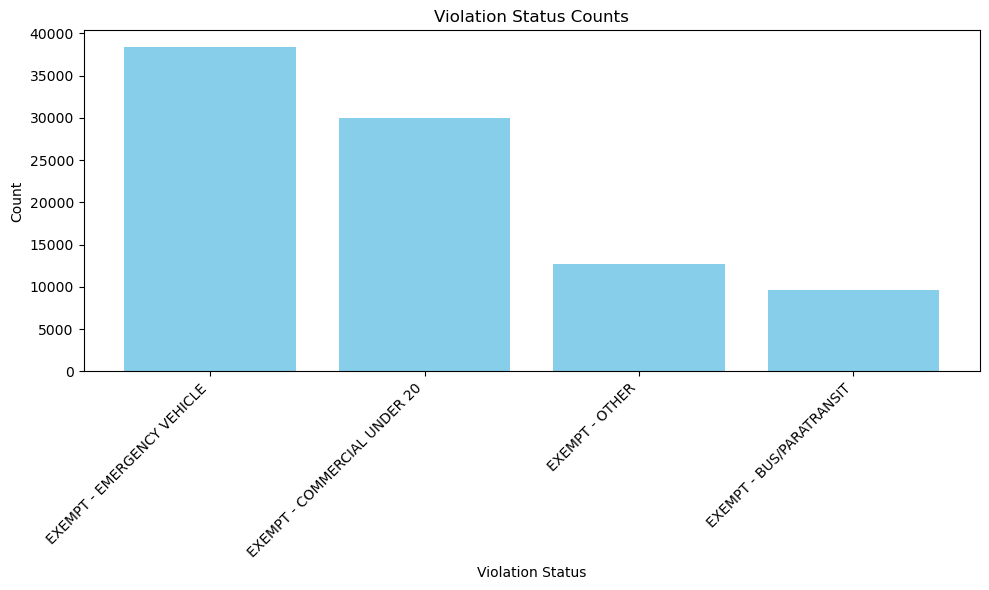

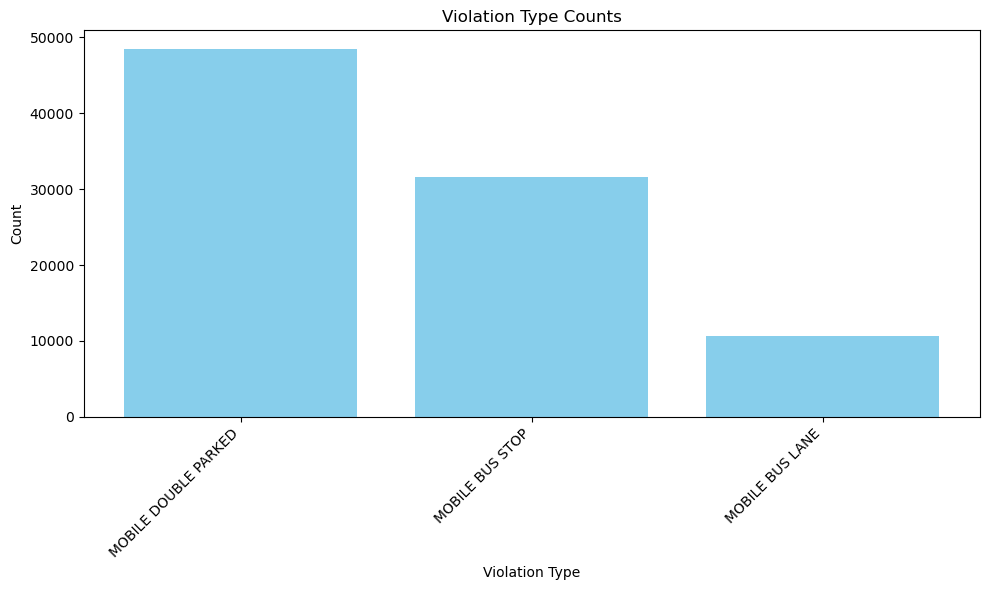

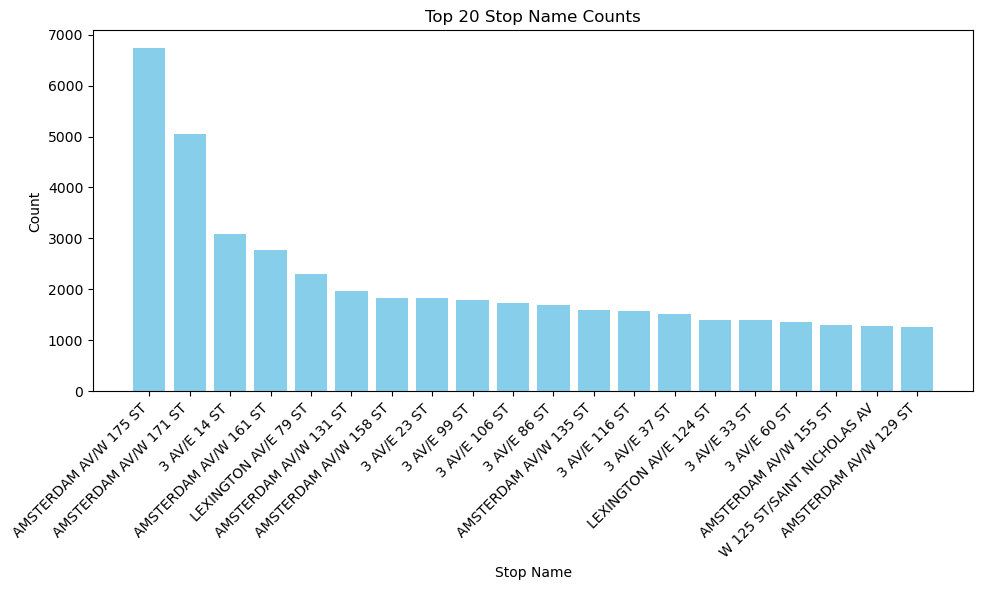

In [35]:

violation_status_counts = exempt_df['Violation Status'].value_counts()
print("Violation Status Counts:")
print(violation_status_counts)
print("\n")

violation_type_count = exempt_df['Violation Type'].value_counts()
print("Violation Type Counts:")
print(violation_type_count)
print("\n")

stop_name_counts = exempt_df['Stop Name'].value_counts()
print("Stop Name Counts:")
print(stop_name_counts)


# Individual bar graphs
def plot_counts(column_name, title, top_n=None):
    counts = exempt_df[column_name].value_counts()
    if top_n:
        counts = counts.head(top_n) 

    plt.figure(figsize=(10,6))
    plt.bar(counts.index, counts.values, color='skyblue') 
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.xlabel(column_name)
    plt.tight_layout()
    plt.show()

# Plot Violation Status
plot_counts('Violation Status', 'Violation Status Counts')

# Plot Violation Type
plot_counts('Violation Type', 'Violation Type Counts')

# Plot Stop Name (top 20 to keep it readable)
plot_counts('Stop Name', 'Top 20 Stop Name Counts', top_n=20)


                                              Vehicle ID  count
2835   1feaad876c46cfe1cc4ee357e410ec2054c5c231d26816...   1340
9586   6d7caef8bf15e2bf8d46aa1e6dd8c0da1ae2fbc5b31ace...    903
9258   6979a2434b4611cf1ebf80624eaeb29622929b061958b9...    903
3756   2a8ac01b157a97b3c124cf33322e71c31062b815dd3b0a...    864
20579  ebabc585284d95a10b6b45730c38fa55dfd57bcc5aea30...    787
...                                                  ...    ...
9736   6f2f4de4ab6f5d8f409ae0c62205f2649fd4443c82985b...      1
9738   6f2fb7c6f703653aacb70171ab86f1819bc500574605e4...      1
9739   6f37c88c7017db34987d1f9d2d9da51cf87ea8ef73e5a7...      1
9741   6f3dbb6ee50899f9d4620dcab3b09bc14b6d3de10d0e09...      1
11185  7fc47331bec445905cb4c490b583fdb52a843ecebea822...      1

[22371 rows x 2 columns]
                                              Vehicle ID  count
15879  28d5db97c873ef7c0baf48e363edeeeb9575ef6e5d3aca...    186
16301  29d82bbcf10821ff01ab68a24c4f023b0b2d6b465a5324...    130
43896  70b7476

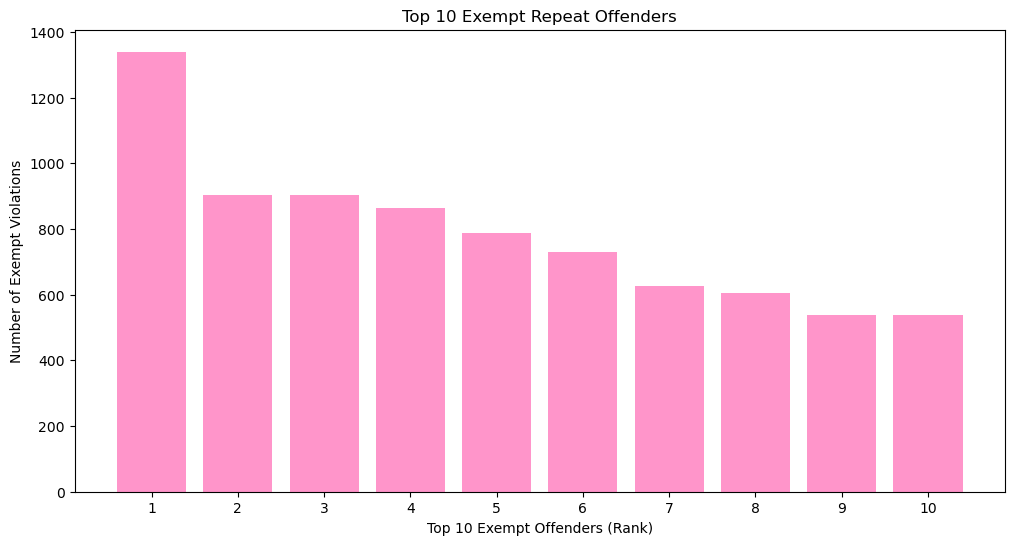

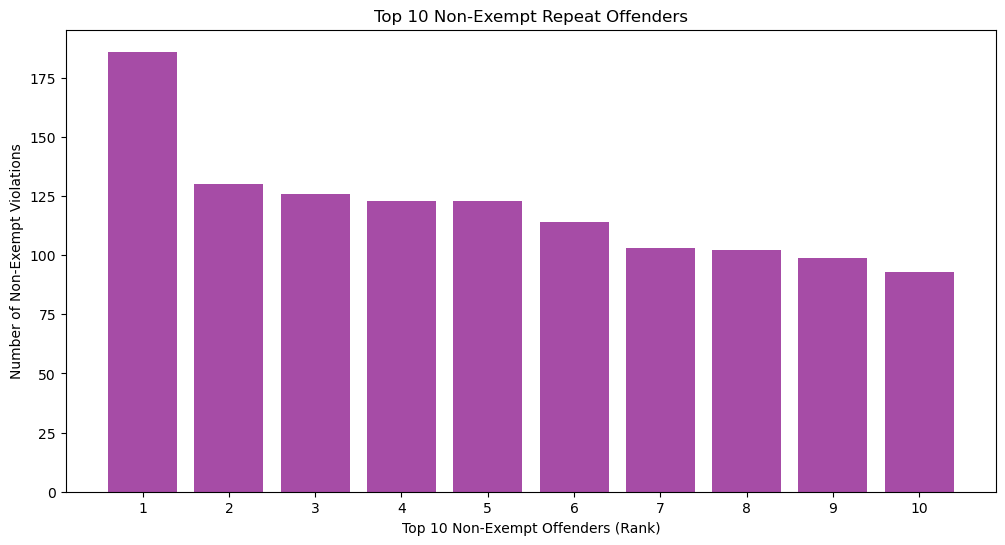

In [42]:
# Exempt repeat offenders
exempt_repeat = (
    exempt_df.groupby('Vehicle ID')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)
print(exempt_repeat)

# Non-exempt repeat offenders
non_exempt_repeat = (
    issued_df.groupby('Vehicle ID')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

print(non_exempt_repeat)

top_exempt = exempt_repeat.head(10)
top_exempt = top_exempt.reset_index(drop=True)  # reset index to 0-9
top_exempt['Rank'] = top_exempt.index + 1      # create Rank column 1-10

plt.figure(figsize=(12,6))
plt.bar(top_exempt['Rank'], top_exempt['count'], color='hotpink', alpha=0.7)
plt.xlabel('Top 10 Exempt Offenders (Rank)')
plt.ylabel('Number of Exempt Violations')
plt.title('Top 10 Exempt Repeat Offenders')
plt.xticks(top_exempt['Rank'])
plt.show()

# Top 10 non-exempt repeat offenders
top_non_exempt = non_exempt_repeat.head(10)
top_non_exempt = top_non_exempt.reset_index(drop=True)
top_non_exempt['Rank'] = top_non_exempt.index + 1

plt.figure(figsize=(12,6))
plt.bar(top_non_exempt['Rank'], top_non_exempt['count'], color='purple', alpha=0.7)
plt.xlabel('Top 10 Non-Exempt Offenders (Rank)')
plt.ylabel('Number of Non-Exempt Violations')
plt.title('Top 10 Non-Exempt Repeat Offenders')
plt.xticks(top_non_exempt['Rank'])
plt.show()

In [47]:
approx_coords = {
    'Amsterdam Ave/ W 175 St': {'lat': 40.841, 'lon': -73.939},
    'Amsterdam Ave/ W 171 St': {'lat': 40.845, 'lon': -73.942}
}

for spot, coord in approx_coords.items():
    # Find violations within 0.002 degrees (~200m) of the spot
    nearby = exempt_df[
        (exempt_df['Violation Latitude'] >= coord['lat'] - 0.002) &
        (exempt_df['Violation Latitude'] <= coord['lat'] + 0.002) &
        (exempt_df['Violation Longitude'] >= coord['lon'] - 0.002) &
        (exempt_df['Violation Longitude'] <= coord['lon'] + 0.002)
    ][['Vehicle ID', 'Violation Latitude', 'Violation Longitude']]
    
    print(f"\nViolations near {spot}:")
    print(nearby.head(10))


Violations near Amsterdam Ave/ W 175 St:
                                             Vehicle ID  Violation Latitude  \
643   fc9c49fd8843d689148238f3f69b051baa305b3a472741...           40.839610   
1160  92f6a3e916473f0dc90cbcf2403be5be7b2b72ae18b2b1...           40.839526   
1718  fc9c49fd8843d689148238f3f69b051baa305b3a472741...           40.839577   
1777  932dd0947e491ed0c51ac4bb9e90f31695d8365425c63c...           40.839742   
2313  fa631d4544736f7196749a8b06a72f5983c94f38fc926f...           40.839033   
2319  fa631d4544736f7196749a8b06a72f5983c94f38fc926f...           40.839013   
3022  6dc34b83b477c2c73ec2d9ffb526264ded101d965f3ef0...           40.839020   
3023  6dc34b83b477c2c73ec2d9ffb526264ded101d965f3ef0...           40.839026   
4300  f2d324e4cee8e3bef7cb04793ee7429eb786dfa755c4a2...           40.839565   
4301  34ec5e76106f48198977db1024330f60a6dfbd4da80fb6...           40.839465   

      Violation Longitude  
643            -73.937089  
1160           -73.937227  
1718

   Hour Time  count
0   00:00:00   1501
1   01:00:00    996
2   02:00:00    474
3   03:00:00    499
4   04:00:00    722
5   05:00:00   1634
6   06:00:00   3597
7   07:00:00   4891
8   08:00:00   5712
9   09:00:00   6958
10  10:00:00   7654
11  11:00:00   7216
12  12:00:00   7449
13  13:00:00   7158
14  14:00:00   6024
15  15:00:00   5096
16  16:00:00   4624
17  17:00:00   3810
18  18:00:00   3446
19  19:00:00   3298
20  20:00:00   2681
21  21:00:00   2118
22  22:00:00   1685
23  23:00:00   1576


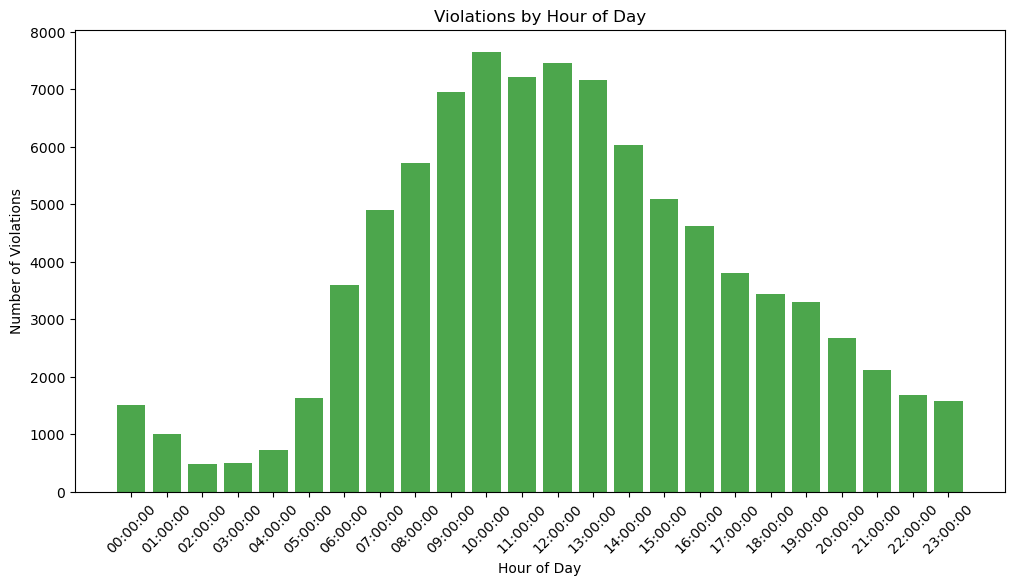

In [49]:
# Make sure 'First Occurrence' is in datetime format
exempt_df['First Occurrence'] = pd.to_datetime(exempt_df['First Occurrence'])

# Extract the hour (0-23) and convert to time format
exempt_df['Hour'] = exempt_df['First Occurrence'].dt.hour
exempt_df['Hour Time'] = pd.to_datetime(exempt_df['Hour'], format='%H').dt.time

# Count violations per hour
violations_by_hour = exempt_df.groupby('Hour Time').size().reset_index(name='count')

# Sort by hour just in case
violations_by_hour = violations_by_hour.sort_values(by='Hour Time')

print(violations_by_hour)

# Plot
plt.figure(figsize=(12,6))
plt.bar(violations_by_hour['Hour Time'].astype(str), violations_by_hour['count'], color='green', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Violations')
plt.title('Violations by Hour of Day')
plt.xticks(rotation=45)
plt.show()